In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [2]:
filename = 'AirQualityUCI.csv'

#Read csv
file = pd.read_csv(filename, nrows=4000)
file = file.drop('Date', axis = 1)
file = file.drop('Time', axis = 1)
print ("Shape of dataset: ", file.shape)

file.head(5)

Shape of dataset:  (4000, 13)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         4000 non-null   float64
 1   PT08.S1(CO)    4000 non-null   int64  
 2   NMHC(GT)       4000 non-null   int64  
 3   C6H6(GT)       4000 non-null   float64
 4   PT08.S2(NMHC)  4000 non-null   int64  
 5   NOx(GT)        4000 non-null   int64  
 6   PT08.S3(NOx)   4000 non-null   int64  
 7   NO2(GT)        4000 non-null   int64  
 8   PT08.S4(NO2)   4000 non-null   int64  
 9   PT08.S5(O3)    4000 non-null   int64  
 10  T              4000 non-null   float64
 11  RH             4000 non-null   float64
 12  AH             4000 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 406.4 KB


In [5]:
print ("Shape of dataset after cleaning: ", file.size)
file[[ 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
        'PT08.S5(O3)','T', 'RH', 'AH']] =file[[ 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 
        'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)','T', 'RH', 'AH']].apply(pd.to_numeric, errors='coerce')
file = file.dropna()
file = file.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", file.size)
file.head(5)

Shape of dataset after cleaning:  52000
Shape of dataset after cleaning:  52000


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [6]:
featureset = file[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)','T', 'RH', 'AH','PT08.S3(NOx)','PT08.S1(CO)']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.9735704 , 0.25197984, 0.8818144 , 0.53982301, 0.72286374,
        0.87326247, 0.8727209 , 0.99296273, 0.58664176, 0.69642857],
       [0.97068717, 0.22462203, 0.87141074, 0.44690265, 0.6743649 ,
        0.87203598, 0.86851332, 0.99280297, 0.64175619, 0.66607143],
       [0.97164825, 0.20734341, 0.86974615, 0.48820059, 0.72517321,
        0.86631235, 0.89060309, 0.99292514, 0.62587576, 0.71517857],
       [0.97164825, 0.20158387, 0.87057844, 0.54867257, 0.74364896,
        0.86263287, 0.91164095, 0.99310567, 0.60345633, 0.70357143],
       [0.96876502, 0.18070554, 0.85934249, 0.48820059, 0.72979215,
        0.86345053, 0.91023843, 0.99311606, 0.6562354 , 0.65714286]])

In [8]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.12581621 0.08408867 ... 0.34942003 0.36068877 0.34429821]
 [0.12581621 0.         0.08816848 ... 0.34833057 0.40067748 0.35049452]
 [0.08408867 0.08816848 0.         ... 0.35162927 0.38050798 0.3487423 ]
 ...
 [0.34942003 0.34833057 0.35162927 ... 0.         0.12987248 0.04871064]
 [0.36068877 0.40067748 0.38050798 ... 0.12987248 0.         0.1102255 ]
 [0.34429821 0.35049452 0.3487423  ... 0.04871064 0.1102255  0.        ]]


In [9]:
agglom = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean', linkage = 'average')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
file['cluster_'] = agglom.labels_
file.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cluster_
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,0
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,0
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,0
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,0
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'PT08.S3(NOx)')

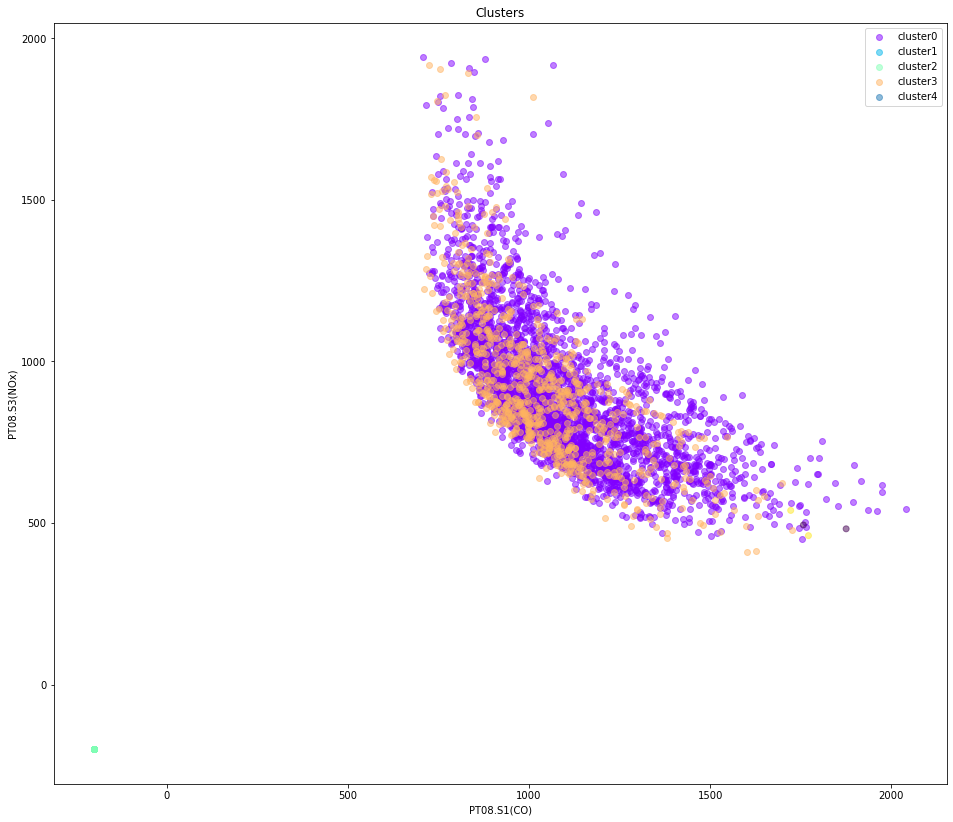

In [11]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14)) 

for color, label in zip(colors, cluster_labels):
    subset = file[file.cluster_ == label]
    for i in subset.index:
        plt.text(subset['PT08.S1(CO)'][i], subset['PT08.S3(NOx)'][i],s=None,rotation=25) 
    plt.scatter(subset['PT08.S1(CO)'], subset['PT08.S3(NOx)'], c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('PT08.S3(NOx)')

In [12]:
file.groupby('cluster_')['cluster_'].count()

cluster_
0    3077
1      16
2      68
3     835
4       4
Name: cluster_, dtype: int64

In [13]:
from sklearn.metrics import silhouette_score

#OUTPUT: [0 0 0 1 0 1 0 1 0 2 1 0 1 0 0 
silhouette_score(x, agglom.labels_)

0.18992219584576242

In [14]:
agglom = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean', linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
file['cluster_'] = agglom.labels_
file.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cluster_
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,0
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,0
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,0
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,0
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'PT08.S3(NOx)')

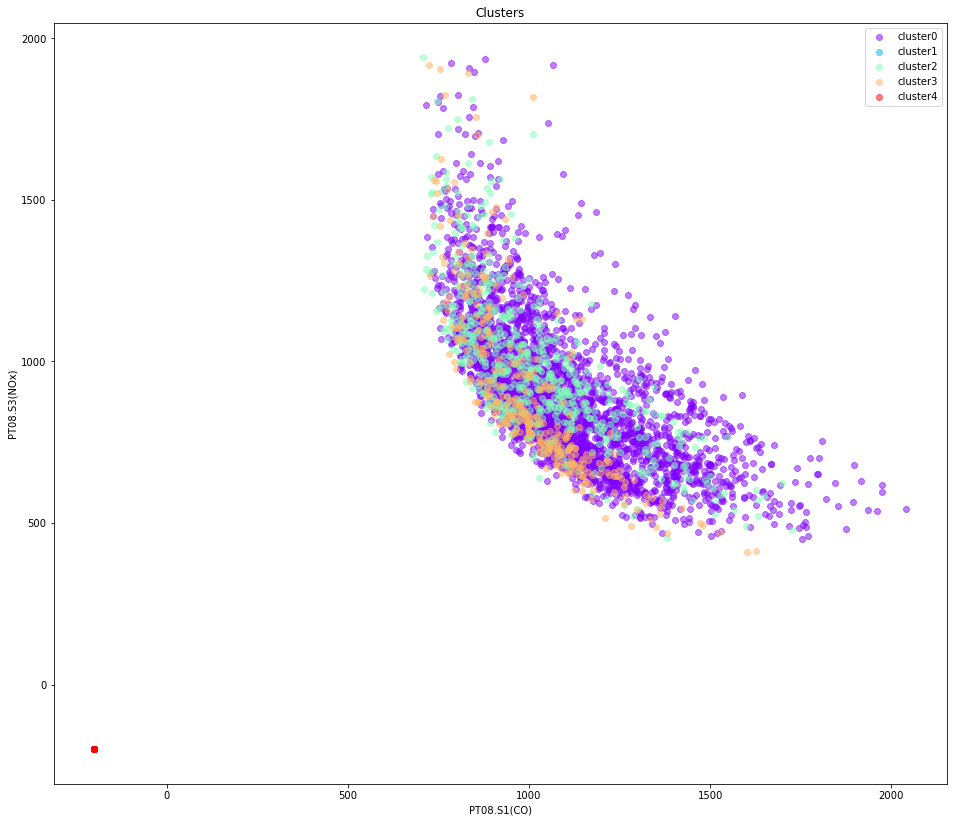

In [16]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14)) 

for color, label in zip(colors, cluster_labels):
    subset = file[file.cluster_ == label]
    for i in subset.index:
        plt.text(subset['PT08.S1(CO)'][i], subset['PT08.S3(NOx)'][i],s=None,rotation=25) 
    plt.scatter(subset['PT08.S1(CO)'], subset['PT08.S3(NOx)'], c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('PT08.S3(NOx)')

In [17]:
file.groupby('cluster_')['cluster_'].count()

cluster_
0    2942
1      67
2     656
3     318
4      17
Name: cluster_, dtype: int64

In [18]:
from sklearn.metrics import silhouette_score

#OUTPUT: [0 0 0 1 0 1 0 1 0 2 1 0 1 0 0 
silhouette_score(x, agglom.labels_)

0.14175039949796286

In [19]:
agglom = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean', linkage = 'single')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [20]:
file['cluster_'] = agglom.labels_
file.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cluster_
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,1
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,1
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,1
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,1
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'PT08.S3(NOx)')

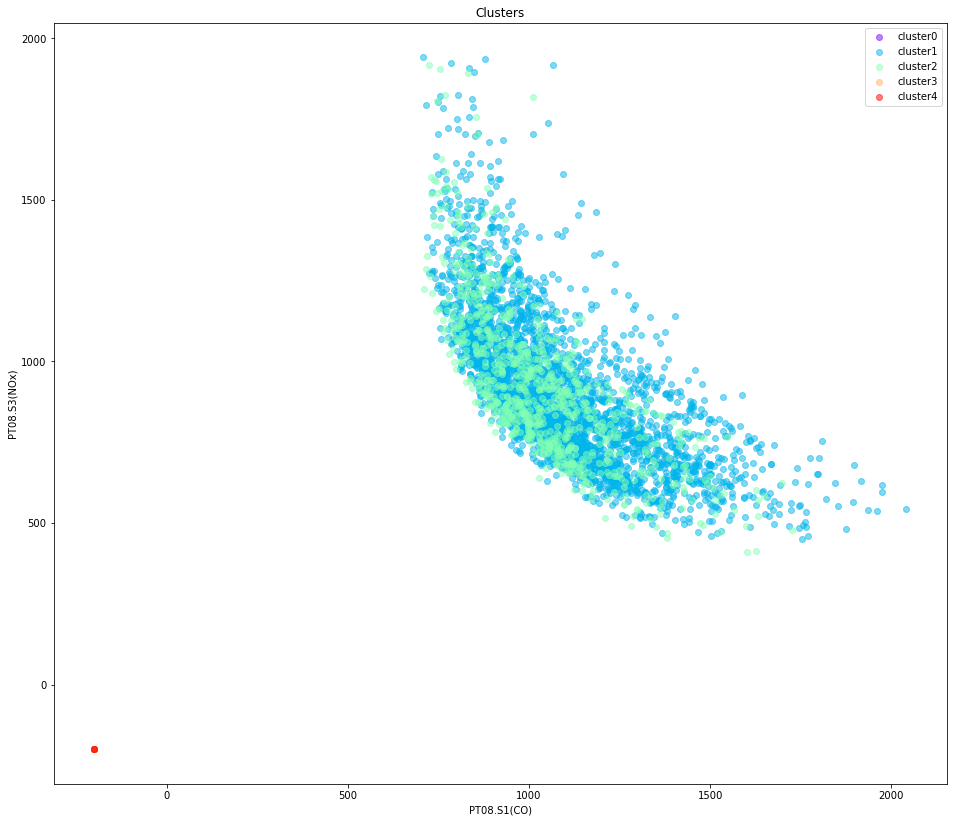

In [21]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14)) 

for color, label in zip(colors, cluster_labels):
    subset = file[file.cluster_ == label]
    for i in subset.index:
        plt.text(subset['PT08.S1(CO)'][i], subset['PT08.S3(NOx)'][i],s=None,rotation=25) 
    plt.scatter(subset['PT08.S1(CO)'], subset['PT08.S3(NOx)'], c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('PT08.S3(NOx)')

In [22]:
file.groupby('cluster_')['cluster_'].count()

cluster_
0      68
1    3081
2     835
3      14
4       2
Name: cluster_, dtype: int64

In [23]:
from sklearn.metrics import silhouette_score

#OUTPUT: [0 0 0 1 0 1 0 1 0 2 1 0 1 0 0 
silhouette_score(x, agglom.labels_)

0.2007427201079937